You've been running our very successful gadget webshop 'DataGadgets' for a few years and have recently expanded into new territories. While you've been focused on the US market for the first five years of our existence, you now are shipping our cool data gadgets to the UK and Europe, too! But now our in-house built reporting has broken! Transactions don't only come in USD, but you're also receiving transactions in EUR and GPB. 

To better understand the volume of transactions being made, you should convert the non-USD transactions to USD and sum up the total. To do this, however, you'll need to use the proper exchange rates. 

In this project, you'll start with a CSV file containing all e-commerce transactions made on January 21st, but in their original currencies. Your job is to calculate the total sum in USD of all transactions so you know how much USD you sold on January 21st. To do this, you'll need to convert any non-USD transactions to USD using the exchange rate from January 21st, 2024. 

To get the exchange rates from January 21st, 2024, you'll rely on [VAT Comply rates API's](https://www.vatcomply.com/documentation#rates) public and free currency exchange API. You'll also use `pandas` to load the CSV file into a DataFrame and the `requests` package to make interacting with the API easier. 

You need to update the `orders` DataFrame so the final version has two new columns: `exchange_rate` and `amount_usd`. The final version should look as follows:

| `amount` | `currency` | `exchange_rate` | `amount_usd` |
|-|-|-|-|
| 43.75 | EUR | ... | ... |
| 385.5 | GBP | ... | ... |
| 495.5 | GBP | ... | ... |
| 117.99 | GBP | ... | ... |
| 624 | USD | ... | ... |

In [5]:
# Import required packages/libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns


# Read the CSV file into a DataFrame
orders = pd.read_csv('data/orders-2024-01-21.csv')
print(orders.head())

print(orders.shape)

   amount currency
0   43.75      EUR
1  385.50      GBP
2  495.50      GBP
3  117.99      GBP
4  624.00      USD
(723, 2)


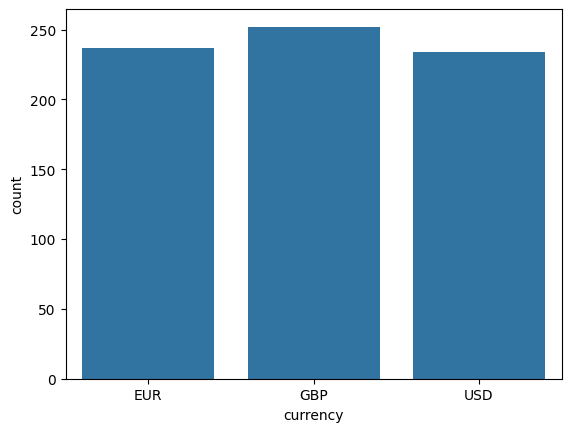

In [6]:
### Plot number of transactions and its currency
sns.countplot(x = 'currency', data = orders)
plt.show()

In [7]:
### API call

# Making a GET request
# Base currency is USD
# The transactions date is 2024-01-21
base_rates = requests.get('https://api.vatcomply.com/rates?base=USD&date=2024-01-21')

# Check status code for response received
print(base_rates.status_code) # 200 indicates success

# Print status code meaning of the response
print(base_rates.reason)

# Print content of the response
print(base_rates.text)

200
OK
{"date":"2024-01-19","base":"USD","rates":{"EUR":0.918526683200147,"USD":1.0,"JPY":148.0389455313677,"BGN":1.7964544870028474,"CZK":22.791402590245244,"DKK":6.849912739965095,"GBP":0.788325525856526,"HUF":350.44548544135205,"PLN":4.0064296867824005,"RON":4.572058418297051,"SEK":10.452833654817674,"CHF":0.8688343896390189,"ISK":136.7686231285019,"NOK":10.480389455313677,"TRY":30.192523192798753,"AUD":1.5155690272802425,"BRL":4.908974005694866,"CAD":1.3461927068981354,"CNY":7.191237255442271,"HKD":7.819233948746211,"IDR":15607.449251400754,"ILS":3.7403325066593185,"INR":83.07936070542848,"KRW":1333.6915587397814,"MXN":17.129971525672822,"MYR":4.717461192247635,"NZD":1.6347937907596215,"PHP":55.98971250114816,"SGD":1.3409571048038946,"THB":35.45972260494167,"ZAR":19.00358225406448}}


In [9]:
### Convert sales revenue

# Get the rates
rates = base_rates.json()['rates']

# Add the exchange rates of the different currencies
orders['exchange_rate'] = orders['currency'].map(rates)

# Convert the currencies to USD
orders['amount_usd'] = orders['amount'] * orders['exchange_rate']

# Observe the final version of the orders dataframe
orders.head()

# Calculate total sales revenue
total_usd_sales = orders['amount_usd'].sum()

print ('The total sales revenue is:', round(total_usd_sales, 2), 'USD')

The total sales revenue is: 326864.4 USD
